In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [17]:
def primeFactors(n):
    factors = []
    
    # Handle 2's
    while n % 2 == 0:
        factors.append(2)
        n = n // 2
    
    # Handle odd numbers
    for i in range(3, int(math.sqrt(n)) + 1, 2):
        while n % i == 0:
            factors.append(i)
            n = n // i
    
    # If n is still > 2, it's prime
    if n > 2:
        factors.append(n)
    
    return factors

# Create all the data first
data = {i: [primeFactors(i)] for i in range(1, 10001)}

# Create DataFrame all at once
df = pd.DataFrame(data, index=[0])

# Example usage:
print("First 10 columns:")
print(df.iloc[:, :10])

First 10 columns:
   1    2    3       4    5       6    7          8       9       10
0  []  [2]  [3]  [2, 2]  [5]  [2, 3]  [7]  [2, 2, 2]  [3, 3]  [2, 5]


In [ ]:
def count_prime_factors(max_num=1000):
    def get_prime_factors(n):
        factors = []
        
        # Handle 2's
        while n % 2 == 0:
            factors.append(2)
            n = n // 2
        
        # Handle odd numbers
        for i in range(3, int(math.sqrt(n)) + 1, 2):
            while n % i == 0:
                factors.append(i)
                n = n // i
        
        # If n is still > 2, it's prime
        if n > 2:
            factors.append(n)
            
        return factors
    
    # Create both dictionaries
    total_factors = {}
    unique_factors = {}
    
    for i in range(1, max_num + 1):
        factors = get_prime_factors(i)
        total_factors[i] = len(factors)
        unique_factors[i] = len(set(factors))
    
    return total_factors, unique_factors

# Get both dictionaries
total_count, unique_count = count_prime_factors(max_num=1000000)

Number: (Total factors, Unique factors)
1: (0, 0)
2: (1, 1)
4: (2, 1)
8: (3, 1)
12: (3, 2)
16: (4, 1)
100: (4, 2)
997: (1, 1)


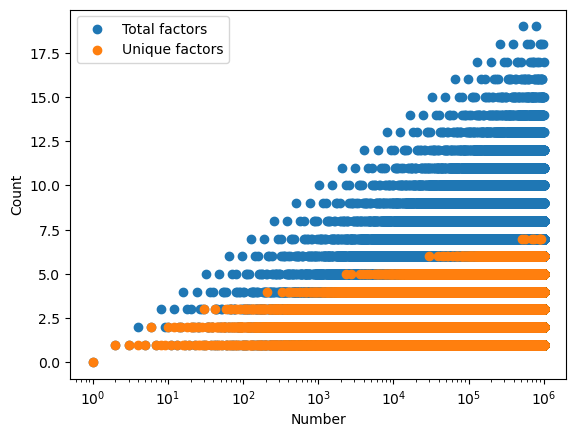

In [27]:
# plot the number of total factors and unique factors for each number
plt.scatter(total_count.keys(), total_count.values(), label="Total factors")
plt.scatter(unique_count.keys(), unique_count.values(), label="Unique factors")
plt.xscale("log")
plt.xlabel("Number")
plt.ylabel("Count")
plt.legend()
plt.show()

In [33]:
# generate a binary string of length 3*n where each position is determnined by a random number (0 or 1)
def generate_binary_string(n):
    return "".join([str(np.random.randint(0, 2)) for _ in range(3 * n)])

# count the number of 1's in the binary string
def count_ones(s):
    return s.count("1")

count_ones(generate_binary_string(100))

149

In [57]:
def chunk_binary_string(s):
    return [int(s[i:i+3], 2) for i in range(0, len(s), 3)]

values = chunk_binary_string(generate_binary_string(100))
np.mean(values)

3.4